In [46]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [47]:
X, y = iris.data, iris.target

In [48]:
X2 = X[:, :2]

Text(0, 0.5, 'Sepal width')

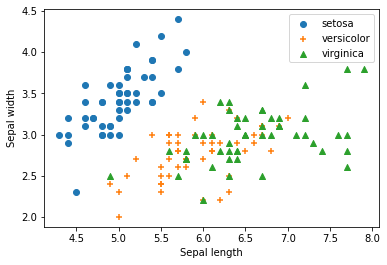

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [50]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

Text(0, 0.5, 'Sepal width')

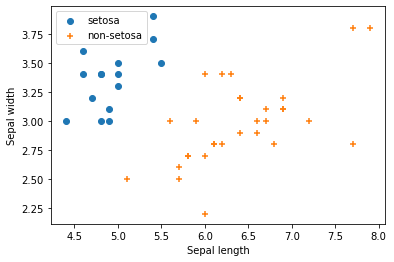

In [52]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [53]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [54]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

In [55]:
clf.score(X_test, y_test)

0.9904761904761905

## SVM

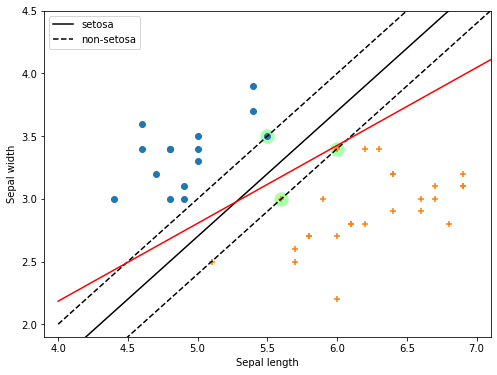

In [56]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)
plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 


plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
# 선형분류 결정 경계선
plt.plot(XX, (-a/b * XX + -c/b), "r-")

In [57]:
svm_clf.score(X_test, y_test)

1.0

In [58]:
svs

array([[5.5, 3.5],
       [6. , 3.4],
       [5.6, 3. ]])

## 커널 기법

In [34]:
import pandas as pd
data = pd.read_csv('data/breast_cancer.csv') 
print(data.shape)
data.columns

FileNotFoundError: [Errno 2] No such file or directory: 'data/breast_cancer.csv'

In [59]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
y = pd.get_dummies(data['diagnosis'])
y.head(20)

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [61]:
x = data.drop(['Unnamed: 32','id','diagnosis'], axis = 1 )
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactne ss_worst',
             'concave points_worst','compactness_se',
             'concave points_se','texture_worst','area_worst']

x = x.drop(drop_list,axis = 1, errors='ignore')
x.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [62]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=0.1,probability=True))
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

In [66]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9904761904761905

## kNN

## 3가지 꽃 분류
### 4가지 속성 사용

In [18]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [19]:
clf = SGDClassifier(max_iter=100)
clf.fit(X_train, y_train)
print("Linear Reg score: {:.2f}".format(clf.score(X_test, y_test)))

svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)
print("SVM score: {:.2f}".format(svm_clf.score(X_test, y_test)))

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K가", i, "일때 정확도: {:.2f}".format(knn.score(X_test, y_test)))

NameError: name 'SGDClassifier' is not defined

## -------------------------연습장-------------------------------

In [20]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
X, y = iris.data , iris.target

In [14]:
X2 = X[:, : 2]

In [15]:
X2

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [16]:
y2 = y.copy()
y2[(y2==2)] = 1 
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

Text(0, 0.5, 'Sepal width')

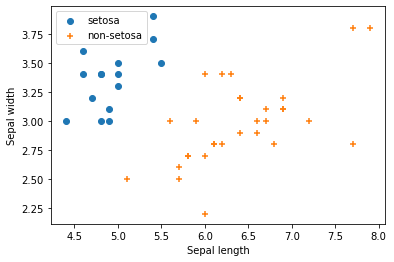

In [29]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

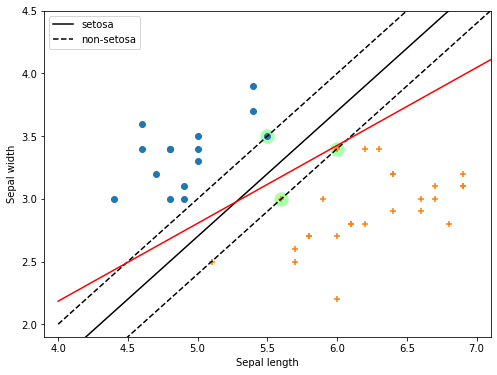

In [82]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))#생성자 이름:svm_clf, C는 무한대로 주다, C는 동작할 때 쓰는 내부 하이퍼파라미터이다
svm_clf.fit(X_train, y_train)  #소프트벡터 분류 머신의 fitting을 하다, 학습을 시키다
plt.figure(figsize=(8,6))
plt.xlim(3.9, 7.1) #x값의 범위를 주다
plt.ylim(1.9, 4.5) #y값의 범위를 주다
w = svm_clf.coef_[0]  #w, v는 서포트 벡터 머신
v=svm_clf.intercept_[0]
XX=np.linspace(4,8,30)

decision_boundary = -w[0]/w[1] * XX - v / w[1]  #decision_boundary로 선하나 그리는데, 
margin = 1/ w[1]   #margin은 이런 식으로 구하다
gutter_up = decision_boundary + margin  #gutter_up & gutter_down: 위아래 점선을 그리다
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_  #서포트 벡터는 svm_clf(우리가 만든 모델 이름에)에 support_vectors 값들이 들어 있다
plt.scatter(svs[:,0], svs[:, 1], s=180, facecolors='#AAFFAA') #svs 점들을 사이즈가 180 크게 해서 연두색'#AAFFAA'으로 하다

plt.plot(XX, decision_boundary, "k-") #descision boundary: 가운데 있는선
plt.plot(XX, gutter_up, "k--")  #gutter up, down  양옆의 선 그리다
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]  #setosa와 setosa가 아닌 것에 대해 점을 찍다
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)  #legend에서 색인, 이름을 넣다
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
#선형분류 결정 경계선

plt.plot(XX, (-a/b * XX + -c/b), "r-")  #선형 회귀, 빨간 색 실선 그려주다

#빨간 선은 선형 분류에 의해 구한 선이다, 결정 경계이다
#서포트 벡터 머신은 점선으로 두꺼운 두 선으로 이루어지다. 그 사이 두꺼운 검정색 실선을 결정경계로 하다
#빨간색이라면 놓쳤을 샘플들을 검정색 선이 좀더 잘 분류할 거라고 우리가 추정할 수 있다.
#검정색 두꺼운 실선은 파란색 점과 노란색 점의 거리 서로 가장 먼 곳에 위치한다.
#선형회귀는 가느다란 선 하나로 나눈 거라면, 서포트 벡터 머신은 두꺼운 선 두개로 인한 중앙선을 최종 경계선으로 삼는다
#두꺼운 점선 사이에 거리가 멀 수 록 좋다. 거리를 margin이라고 하다
#연두색 3개 포인트가 두꺼운  선에 닿는 부분, 그 사이에는 벡터가 없다
#연두색 점 3개가 마지막 가장 가장자리 벡터이고,점선으로 된 두꺼운 검정선을 지지하는 벡터라고 해서 서포트 벡터라고 부른다


#서포트 벡터를 쓰면 좀더 계산량은 많지만  좀더 보편적이고 중심에 있는 선을 찾아준다.

In [83]:
svm_clf.score(X_test, y_test) #서포트 벡터의 score을 내다

1.0

In [84]:
svs  # 이 값은 연두 색 3개의 점 좌표이다

array([[5.5, 3.5],
       [6. , 3.4],
       [5.6, 3. ]])

서포트 벡터 머신의 성능은 선형회귀 보다 좋지만, 특정한 경우에만 쓴다
샘플의 수가 적을때 다만, 정확하게 파악하고 싶을때 서포트 벡터 머신을 쓴다
샘플의 수가 많을 떄는 계산량이 많아져, 많이 쓰이지 못한다
지금은 신경망이 나와, 신경망이 서포트벡터 머신보다 분류를 잘한다

#### 커널 기법

In [30]:
import pandas as pd
data = pd.read_csv('C:/Users/김준석/Downloads/breast_cancer.csv')
print(data.shape) #569개 행, 33개 속성값
data.columns

(569, 33)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [31]:
data.head()
#Unnamed 32는 실수로 들어갔다. 나중에 제외시키다

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
y = pd.get_dummies(data['diagnosis'])  #M이나 B 같은 것을 숫자변수로 바꾸어주기 위해 dummies를 사용하다
y.head(20)  #get_dummies: data의 diagnosis를 뽑아다가 인자로 해, 출력을 하면 0과 1로 변환시켜주다 
#diagnosis 를 목적 변수 y로 하다



,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [44]:
x= data.drop(['Unnamed: 32','id','diagnosis'], axis = 1)  
#불분명한 데이터(Unnamed) 빼고, 환자 번호도 의미없어서 빼고, 목적변수(diagnosis)를 빼다, 안빼면 정답을 알고 훈련을 하는 것이기에 하나마나 한 훈련이다
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactne ss_worst',
             'concave points_worst','compactness_se',
             'concave points_se','texture_worst','area_worst']
#33개 데이터 안빼도 되지만, 임의로 빼다. 뺄 목록을 만들어 주다

x= x.drop(drop_list,axis = 1, errors='ignore')  # errors='ignore': 뺀데에서 또 뺼 수 있기에, 없으면 지나가라
x.head()  #이 것만 가지고 분류 하겠다

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=0.1,probability=True))
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

In [65]:
from sklearn.multiclass import OneVsRestClassifier  # 하나와 나머지를 분류 하는법, 이진분류
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=0.1)) #이진분류를 하되, 내부적으로 서포트벡터 머신을 쓰다 , 즉 이진분류 안에 서포트 벡터 머신이 있다
#kernel='rbf' : 커널 기법을 써라   # C=10, gamma=0.1  : 커널 기법에서 얼마나 많이 반영할 것인가 정하는 하이퍼 파라미터이다 , 여기서는 기본값을 사용하다
classifier = classifier.fit(X_train, y_train)  # 학습시키다
classifier.score(X_test, y_test) #학습시킨것 score을 구하다





1.0

In [66]:
#앞에서 배운 분석 모델와 비교하다
clf = SGDClassifier(max_iter=1000) #고차항이 아닌, 1차항 분석 모델이다,SGDClassifier: 선형분류
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#큰 차이는 안 나지만, 1차원 선형 회귀 모델을 쓸 때 보다 커널 기법을 쓸때 모델 score가 더 좋아지다

0.9809523809523809

### KNN

In [109]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 20):  #초기값 1부터 9까지
    knn = KNeighborsClassifier(n_neighbors=i)  #knn: KNeighborsClassifier에 대한 생성자를 만들다
    knn.fit(X_train, y_train) #훈련시킬때는 x_train, y_train 값으로 훈련시키다
    print("K가", i,"일때 정확도: {:.2f}".format(knn.score(X_test, y_test)))  #knn이 제공하는 score 값을 구하다
    #테스트 할 때는 x_test, y_test값으로 테스트하다
    
    #k가 작으면 너무 민감해서 문제이고, k가 크면 너무 둔감해서 문제이다

K가 1 일때 정확도: 0.98
K가 2 일때 정확도: 0.98
K가 3 일때 정확도: 0.95
K가 4 일때 정확도: 0.96
K가 5 일때 정확도: 0.95
K가 6 일때 정확도: 0.95
K가 7 일때 정확도: 0.94
K가 8 일때 정확도: 0.95
K가 9 일때 정확도: 0.94
K가 10 일때 정확도: 0.95
K가 11 일때 정확도: 0.94
K가 12 일때 정확도: 0.95
K가 13 일때 정확도: 0.95
K가 14 일때 정확도: 0.95
K가 15 일때 정확도: 0.95
K가 16 일때 정확도: 0.96
K가 17 일때 정확도: 0.95
K가 18 일때 정확도: 0.96
K가 19 일때 정확도: 0.92


### 결정트리

In [ ]:
ㄹ